In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv('./Gulshan/python_projects/dataset/train_2v.csv')

df.head()
#display the first few rows of the dataframe


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [74]:
print(df.info())
#display general info abt the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB
None


In [75]:
print(df.describe())
#display summary statistics for numerical columns

                 id           age  hypertension  heart_disease  \
count  43400.000000  43400.000000  43400.000000   43400.000000   
mean   36326.142350     42.217894      0.093571       0.047512   
std    21072.134879     22.519649      0.291235       0.212733   
min        1.000000      0.080000      0.000000       0.000000   
25%    18038.500000     24.000000      0.000000       0.000000   
50%    36351.500000     44.000000      0.000000       0.000000   
75%    54514.250000     60.000000      0.000000       0.000000   
max    72943.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       43400.000000  41938.000000  43400.000000  
mean          104.482750     28.605038      0.018041  
std            43.111751      7.770020      0.133103  
min            55.000000     10.100000      0.000000  
25%            77.540000     23.200000      0.000000  
50%            91.580000     27.700000      0.000000  
75%           112.07

In [76]:
print(df.describe(include=['object']))
#display summary statistics for categorical columns

        gender ever_married work_type Residence_type smoking_status
count    43400        43400     43400          43400          30108
unique       3            2         5              2              3
top     Female          Yes   Private          Urban   never smoked
freq     25665        27938     24834          21756          16053


In [77]:
print(df.isnull().sum())
#check for missing values

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


In [78]:
print(df.duplicated().sum())
#check for duplicacy

0


In [79]:
df=df.drop_duplicates()
#drop duplicate rows

In [80]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [81]:
raw_data = df.drop(columns=['id'])

In [82]:
raw_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [83]:
raw_data.sample(n=10000).to_csv('sample_data.csv',index=None)

In [84]:
#handle missing values
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['smoking_status'] = df['smoking_status'].fillna('unknown')

#encode categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['work_type'] = le.fit_transform(df['work_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

# Split the data into features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

In [86]:
#calculate corelation matrix
corr_matrix = df.corr()
print(corr_matrix['stroke'].sort_values(ascending=False))

# Perform hypothesis testing
from scipy.stats import chi2_contingency, ttest_ind
# Conduct chi-squared test for categorical variables
print(chi2_contingency(pd.crosstab(df['gender'], df['stroke'])))
# Conduct t-test for continuous variables
print(ttest_ind(df[df['stroke']==0]['age'], df[df['stroke']==1]['age']))

stroke               1.000000
age                  0.156049
heart_disease        0.113763
avg_glucose_level    0.078917
hypertension         0.075332
ever_married         0.071920
bmi                  0.018407
gender               0.011198
id                   0.002976
Residence_type       0.002247
work_type           -0.010800
smoking_status      -0.041225
Name: stroke, dtype: float64
(5.767894799445178, 0.05591361325694649, 2, array([[2.52019656e+04, 4.63034447e+02],
       [1.74042329e+04, 3.19767097e+02],
       [1.08015438e+01, 1.98456221e-01]]))
Ttest_indResult(statistic=-32.91160061215167, pvalue=1.1715396598877709e-234)


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Accuracy: 0.9813364055299539
Precision: 0.0
Recall: 0.0
F1-score: 0.0


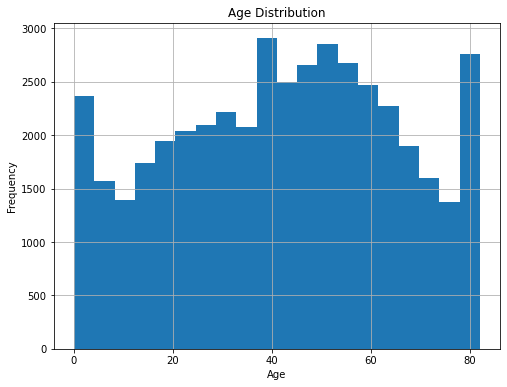

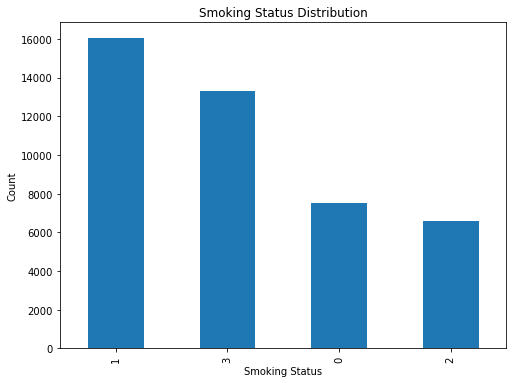

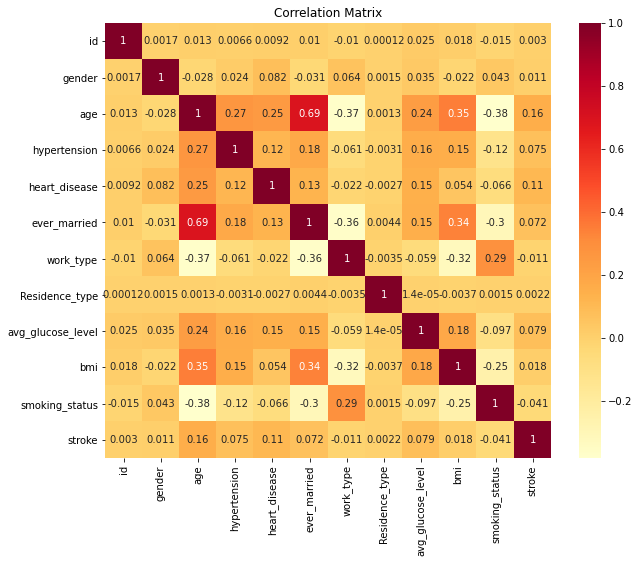

In [87]:
# Plot a histogram for age distribution
plt.figure(figsize=(8, 6))
df['age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Plot a bar chart for smoking status
plt.figure(figsize=(8, 6))
df['smoking_status'].value_counts().plot(kind='bar')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Smoking Status Distribution')
plt.show()

# Plot a heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()